<a href="https://colab.research.google.com/github/Intanpratiwiiii/Intann/blob/main/Safetyintanpratiwi_2226270020pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  1. lakukan pengolahan citra digital menggunakan google colab. berikut adalah langkah-langkah yang harus dilakukan:

  A. Membuat gambar grayscale dari link

  B. Histogram equalization

  C. Filtering di domain frekuensi menggunakan gaussian filtering

In [158]:
# libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

### **A. Membuat gambar grayscale dari link**


*   Memuat gambar dari sebuah link



In [159]:
import urllib.request
urllib.request.urlretrieve('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS7QlPYXI2RDv0-NQLc39_K3SS_N6yPBY4myQ&s','jambu.jpg')

('jambu.jpg', <http.client.HTTPMessage at 0x7cc0d013c0d0>)

Resolusi gambar : 275x183 piksel


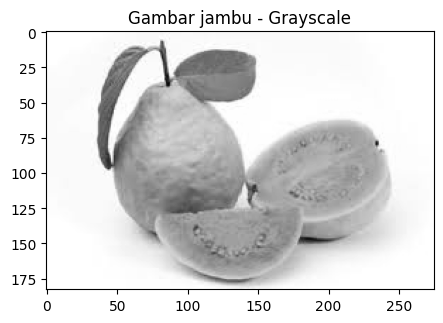

In [160]:
import cv2
import matplotlib.pyplot as plt

# membaca gambar dalam mode warna
image = cv2.imread('jambu.jpg', cv2.COLOR_BGR2GRAY)

# mendapatkan resolusi gambar dalam piksel
height, width, channels = image.shape
print(f"Resolusi gambar : {width}x{height} piksel")

# konversi warna dari BGR (OpenCV) ke RGB (Matplotlib)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# menyimpan gambar hasil grayscale
cv2.imwrite('grayscale_image.jpg', image_gray)

# menampilkan gambar
plt.figure(figsize=(5,5))
plt.imshow(image_gray, cmap='gray')
plt.title('Gambar jambu - Grayscale')
plt.show()


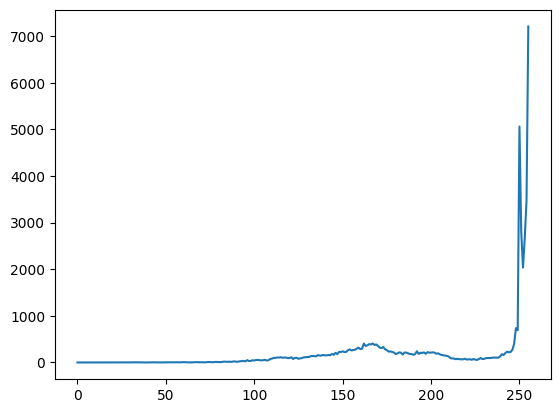

In [161]:
# membaca gambar masukan
img = cv2.imread('jambu.jpg',0)

# menemuukan frekuensi piksel dalam rentang 0-255
histr = cv2.calcHist([img],[0],None,[256],[0,256])

# menunjukkan grafik plotting suatu gambar
plt.plot(histr)
plt.show()

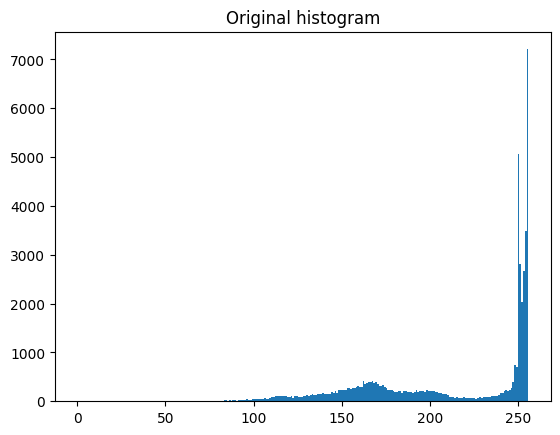

In [162]:
img = cv2.imread('jambu.jpg',0)

# cara alternatif untuk menemukan histogram suatu gambar
plt.hist(img.ravel(),256,[0,256])
plt.title("Original histogram")
plt.show()


### **B. Histogram equalization**

*   Lakukan histogram equalization pada gambar grayscale yang sudah dihasilkan
*   Plot histogram gambar sebelum dan sesudah dilakukan histogram equalization
* Plot gambar gambar sebelum dan sesudah dilakukan manipulasi histogram



In [163]:
# fungsi ini menampilkan gambar grayscale dan histogram intensitasnya secara berdampingan.
def calculate_hist(gray):
  fig,ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].imshow(gray,cmap="gray")
  ax[0].axis('off')
  ax[0].set_title("Image")

  ax[1].hist(gray.ravel(), bins=32, range=(0.0, 256.0), ec='k') #calculating histogram
  ax[1].set_title("Histogram")
  ax[1].set_xlabel("range")
  plt.show()

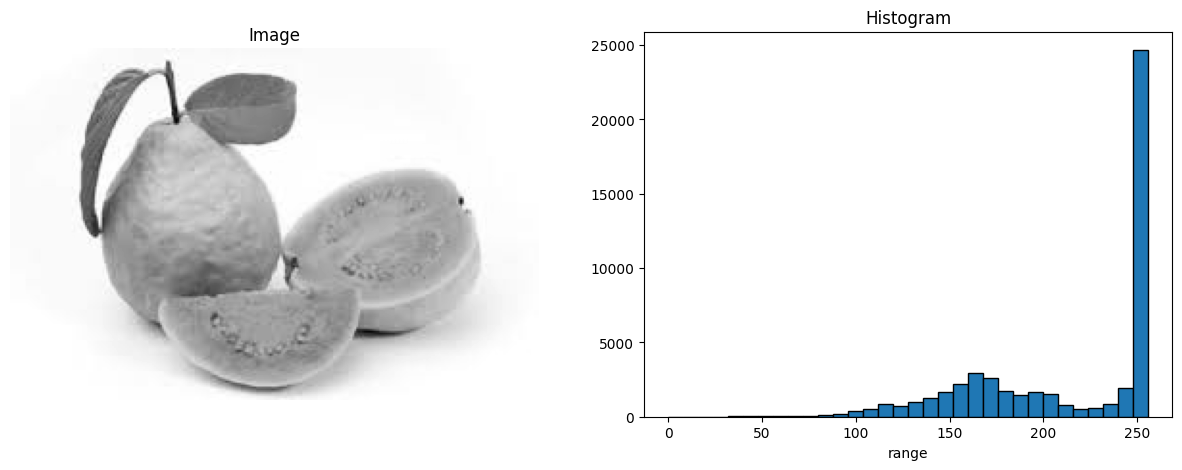

In [164]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
calculate_hist(image_gray)

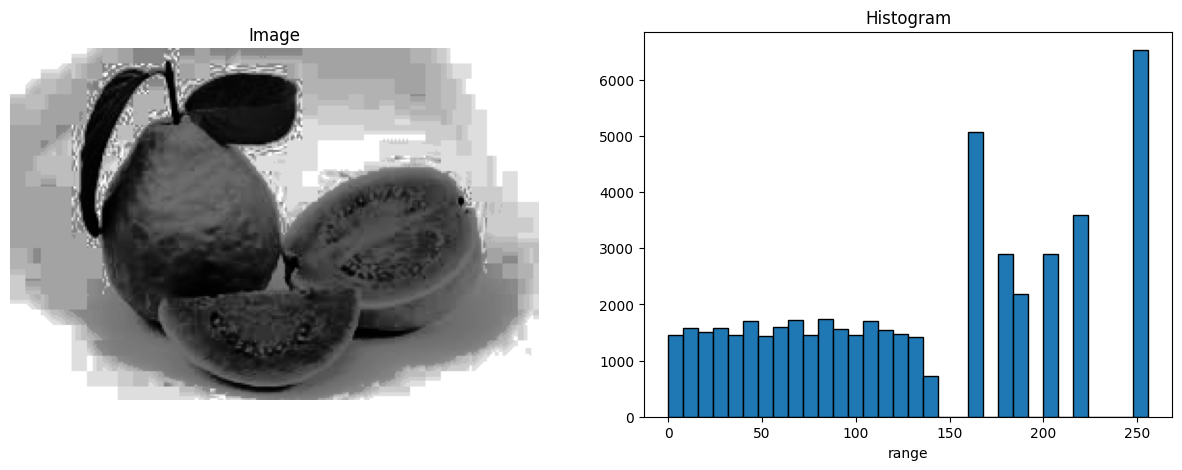

In [165]:
equalized_gray = cv2.equalizeHist(image_gray)
calculate_hist(equalized_gray)

### **C. Filtering di domain frekuensi menggunakan gaussian filtering**


*   Lakukan gaussian filtering pada gambar dengan menggunakan filtering di domain frekuensi
*   Tampilkan hasil gambar setelah gaussian filtering



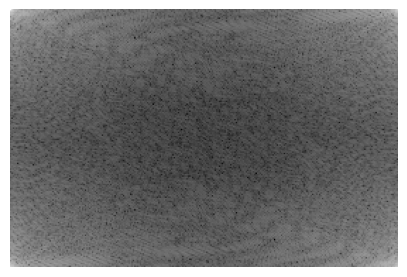

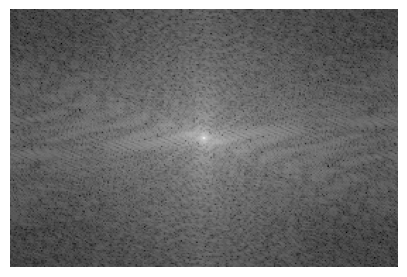

In [166]:
# mengubah gambar ke domain frekuensi, f --> F
image_gray = np.fft.fft2(image_gray)
Fshift = np.fft.fftshift(image_gray)

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(image_gray)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

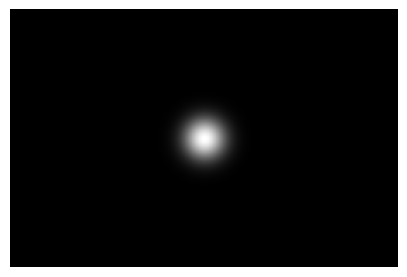

In [167]:
# membuat Filter Gaussian: Low Pass Filter
M,N = image_gray.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 10
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

plt.figure(figsize=(5,5))
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

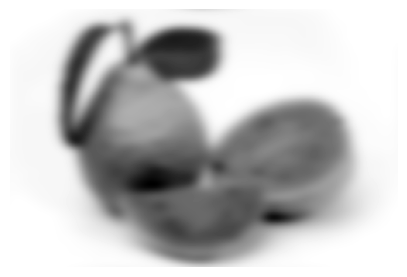

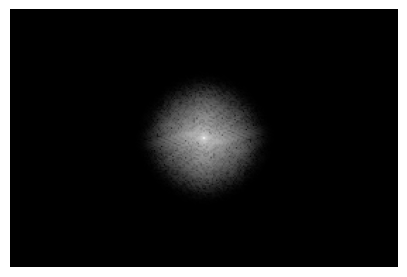

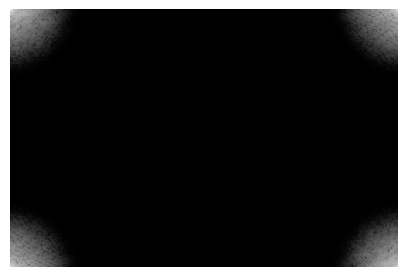

In [168]:
# filter Gambar
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

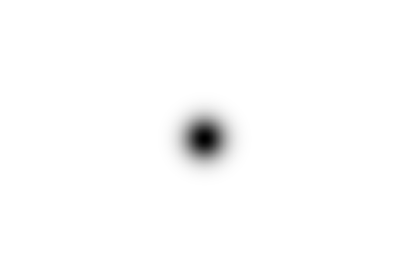

In [169]:
# Gaussian: High pass filter
HPF = 1 - H

plt.figure(figsize=(5,5))
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

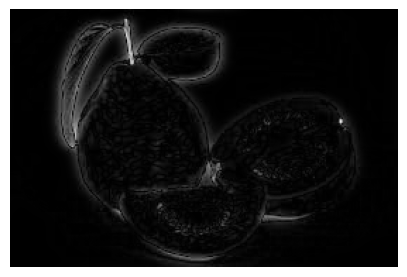

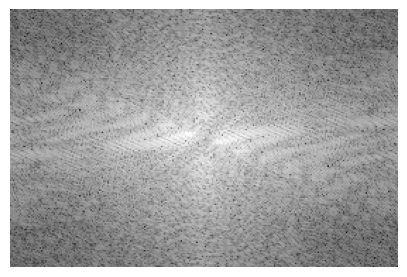

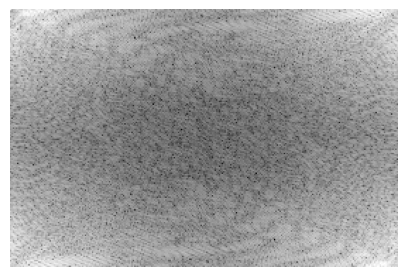

In [170]:
# filter gambar
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

  2. Lakukan pengolahan citra digital menggunakan goegle colab. Berikut adalah langkah-langkah yang harus dilakukan:

  A. Membuat gambar grayscale dari link

  B. Spatial fitering
  
  C. Tampilkan dan Bandingkan Hasil

In [171]:
# libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

### **A. Membuat gambar grayscale dari link**


*   Muatlah gambar grayscale dari sebuah link




In [172]:
import urllib.request
urllib.request.urlretrieve('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUSExMVFhUWFxcaGBgVFRUXFxgXFxgXHRoXGBcYHSggGBolGxgXITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGy0lHyUtLS0tNTAtLS8tLS0tLS0tLS0tLS0tLS0uLy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAMcA/QMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAAAAQMEBQYCB//EAEAQAAEDAgMFBQYEAwcFAQAAAAEAAhEDBCExQQUSUWFxBiKBkfATMqGxwdEHFFLhI2JyQlOCorLC8RUzRJLSJP/EABoBAAIDAQEAAAAAAAAAAAAAAAADAgQFAQb/xAAwEQACAgEEAAMGBgIDAAAAAAAAAQIDEQQSITEFQVETImGBobEUMnHB0fBC4VKR8f/aAAwDAQACEQMRAD8A9xQhCABCEIAEIQgAQhCABCEIAEIQgAQhCABCEIAEIQgAQmqtdrcz4aqHW2mBkPNLlbCPbJxrlLpFihVA2g46pHX7hr8Er8XAZ+HmXCFVM2rxUyhesdrB5pkboS6ZCVM49okoQhNFghCEACEIQAIQhAAhCEACEJHOjNACoUC42iB7vmqy4vydUmV0UPhp5yL51ZozI81w68Z+pZSpcuPFK15iZSXqsFpaFebNI/adMarg7Xp81k7i5jNMtumnilPWMfHw6LWeTaN2ow8VIp3LXZFYujcDQqW27IyKlHV+oqehS6NehUVltQjAlXNGsHCQVbhZGfRRsplW+RxCEhMYpgoHOAEnAKpu9pzg3AcdVB2ttTeO6Mh6lVz7hZt2q3PbDo0qNG8bpEs3HPxTFStwUb2k80zVqxgq0cIvxqLC2rp24rQqmlX5HBThDjgpY80cnBKWWR6l4cUlvtE8VWbVrezdBwmfkfsoOzrjeknIKFjxyWoUxlDJuLHbcYTI4H6K8tr5j8AYPArzGnfS7A6q6tbl2E54KxRqJJFPU+HR7XBvkKm2btI+6/zVyFpQmpLKMSytweGCEIUiAIQhAAhCCUAcVagaJOSpLy/LjwGgXO0rwvdA90epVa93BU7rc8I0dPp8cy7Oq9wmHOTbzJ4p2jTxxVKViRoKKihueCSoSM1P/KNORhc17B0cQq0p5OK2OTObRqw0+KpWX2MT+60m3KDA2Ig8VgbDefW3BlOfAJEbU858jY0jhOts1tncYDFWlKqq82lOlS3y8DrGPIKAdqvPdpNJ5gE/AZKdUnPlGbrNbp6uW/l5mkNyBnh1y81It9vsZHfE8pPnCxj6VZ+Lp/xEA+AKVtg/iB/iH3V+G5dHnr/Fd3EYcfE9Ipdr7cjEunWGlRNqdqqLhuMLuZLSPBYhlu4cPNSBR5hPlbOcdrKMdVKMtySLE3QccD8/qlNfDLDioAp+pT1MEJHsFjCZpVeNTz78E18OP5JNOuPCEm8Ey5ngm5I4pEoSh2bem1lF/wCV4foyWyvBzU63q4qiD1Jo1419dU2uWRuorwhztPampSdUYN5zRO7xjMjnGixNzWqim00wXMIxIGTtRz4z1W6t7gyIk9Sodr2Tqjei4a1ri7utYS4MJMN3nOzDYEgKViTaQiq6dS5KPs8HHHHrx+y2FFsJ+2sadMBo0wy4Jar2pijzwF2p3j9CtxV7sq8B7hPT7LK1KnoKTY3BBB4EJ8HtZnWR3xNohcUam80Eahdq4ZwIQhAAoG17jdbGp+SnrObYry88BglWy2xH6avfMg1HpqVy+ouKtbRZVk8G3GIjqgA9Qkbdc4UKs/P0Ez7TD58UjssKpNcl2K+sqRRuowWbbWOnr7KVTuF1IXPTidsaFU0i+kwv4huLuobmfBed7AuHEuqP/hsBhzngjEZtAzJ5L1WhcwJlRNsbPt7kRWYCRk7Jw6OGPhkoOmDTS8yMLLILb5FJZURX77GFwGAdUg/+rT3QPM81O/6JUOLqngJIUm1p+yAptwa0DdAyhTmVJzK5GDiKt01Unnan9TN3WzqzPdLXeB+6q6l/WbmwYdQtpXEqovbQOBU/aS8mSr0GkksSrX1KKltWTi34q6ZSmk6oHA7oktjTXGeGKoLm1LXKz2Nebp3TkcPBSjfLPLGT8F0iW6MPq/5GhtTl8U83aYmIWcv3+zqPpn+y4gcxp8IXTLucVyVti8y2vBtC1lQ+r/k1LL8Hl4rp1y2Jj14LP0HyJK1mxdiSBUrZZhh1/q5clCN1kuMlXUeF6OpbsNfo3+5zs3ZDq43mndZxLc+g16q3b2ZbGD3/AA+ULQWlOG8/lyHJOuQ4SzuTM56uxe7FvHx5+pmR2dqNMtqDxbHxlR7q1uWnIHmHYDzWtxTVUA4LknKCzF8/ElHWTz7yT+Ri6t24Eh2BHHVMN2iOq19ewDjlnpofBZra3ZR079J0H9LsvA/dTo1jy1YsfYbKyqxejGfzIOuCn2tTDis40Ppu3XtIPMfIjNWdnVxWipJ8og4cG/2LVmnHBWCpuzrsHeCuVdg/dRk2LEmCEIUyBy90AngFkrh0rU3p/hu/pKyVSZVXUs0NDHtkV4w4KPUxwCmVIIjVQnYZrLnybFZHr4KI7P1opNVyYDMOqhnBajwhs1IzXbKyYrNx+y5aoqXAzasFgLmPHJLTu/h9FX1npp9eMMURZH2SaLs3XdJww1OQ9CUz7fgZ1wVc24PE8+n1UdtycDy8cM8sk2XKIwq5L9txguKlUwq23r4qU6pIVZtpnXVhkK9bqoNtSe53caXdBh4nJT2A1HimNTHQalbGysmsYGtGASLbvZ9LLO36hUxSxyzznb3Zm9qVfaU6O8HNbID6YIIEYgkaAJiz7LXznBjqBZ/M9zd0eIJles0qJXZ3gRxRVqrJr34f9GevErI8LBndjdm6VABzzvvGpGAPIfVSbi7IdAOZwU69DSDhB4wfos9f39KkCd9rniDq2MYkTiTJ0KuZhKOFwcrcrXunls2tG5D2BwMHUcDqEMqA4TivJLntLcB0MJZMEb7fezziYGHNWlHty+mxj6tMukxvUxgIMOmThBBGQTIVPGZFWekw/dZ6douGt1Wa2T2ztqwHfAJ0Pwk5BX35huhHmpNKXRWlTODw0Plq4aNClZVnVdlLlUnyhfKIF3s5lQEESOenMcFn6+ynUnS3Fs+I68VsCm6rAf3UIqVLzHr08v8AQ2FzXDE7PDuk9FbKr2bWDD7M4SZB+hVqtvTXQtrzH/wp3JqQiVCFYFDN4O47oVl4z8lq6rZaRxBWVc3MKpqi/o3w0RazMcFCrs8lPqlQK5lZzNepsg1DiuYwXWMnguGmSkTLqI1fJcs9dU7XaI88FGe/BK5Y1co5rv8ANRKziE7Ufjko1xVxATI94GRWDqlWxxXLamB9YKL7XXyXPtc8dU7DJJLJY21cDDmphucCqBtYrt93DYlKnEb7LJqOxw9pWe79IHgXE/Zbuk3DFYr8O6f8Fz/11D5NAHzlbik4Ku0va4POeJzzc8dLgdhNVWJ8GVHu3kNJWgklHJmxzkoNrV90HdgnmTE/Befbc2jd1Q9jHNaCYLWsaN7dzBzcAct6VsNr03DGHOABJgnTxxWDftEvruDbdwBD5e5xmTn7xwGOQ5Kvp23Nto2oxUYLHZEbT74e5273IIdvAid4yDlM58ZJGaSteNFQUjvNJIcxzXQMQZjR0wJn91G2hVplgpw9wLhjM7oaOI8B5pt1bXuksMtwmJzzyV/vsXhku4vmNG85gh/dJiHB0gzI4idFbbJ7XOoXHssSJ90mT1B0kRhyWYtrttWp7N4kYGDgZnP6qLt+6LqgYwAkOGIGLpAAkxjkuey3SSfZ12JRz2j3/Zl+17S8OkGORBwwIzB6qyo3YJj4rx3Y+1HUBTj35DXjNpb/ADDlhivStjbTbWpio0QCSDOJa4GCD4qu4t8Ir3ULG40rDKHNTNGtxTpfOik8Y57M5ppjT2g5qXYXM9w5jLmPuo7gmajiMdRiFXrtens3+XmdcVNYLpKmreqHtDhqnV6KMlJJroptYeGCzl7T3Xubz+a0arNsUMn+B+iTfHMR+mntnj1M9ctVbWVrWVbWKzJI3aWQauATLTGKfeExVySJIvxIly/gmGPIxT9RuiZpMEwocJD0lgZcFAr+8Va1yADGmqqKrsz4qVXJJEYHGfklpHFy5XNFxgp0uiUWI85+CjVqh8l2+pn0UN+K6oE3bg9T7DmLWjzDj5vctfb5LGdjX/8A5KJ4bw/zuWut3YA+ao2+5fn1R5nVrMmyYCuajQQuAUrTjirlVmeCjgpKxg7vl1Xm/amqKdR1Qghrsd4AndcBkRwkL0zaUB7TObgD4lU+0dj0n0HMfiMxOPFQhH3sehqVzxHPqeOXbS8+3oHF3vs0dzbzhRCfaRuHce094OOHkVKfQo7xosL2VGu3Q5pJ3nDPu+fko1z7Skf4g3h+tv8AuC0YvPX9/kjLjv5/r+32JzKu+8gNBeA4OfyjjoOaesazKRdVLe+9sCDBAykag44EKmG0Q0Hdk72YGBx/YKS4ljRUqZlpgcMMFGUGuDu+L+5b2xa9zHkOG4QZYRjMDvdMMVouzu2HU659mA6ng2oBh3/1x4gE590LBCpUbbtDDL3yTBM7g5a6q/7PANpBg3hUquzAzAxMg5YwlThtWc/AnCe7jB7NabQ3h5yJy81Y0asYYrG9nb9tdu8N0gzjzB+WvitZbNEDNVbc4TXZX1NSgyfK5cUA8vNIXJFkuCikSNmGCW8cR8j9FYqntnxUbzkfD/hXC2fD57qcenBXvWJZ9QXNVgcCDqukK8JMrd0i0kHMfHmqe6atntWy9o2R7wy5jgsjdCDks22razc0d29fEragMKMXYwrCowHyVdXpkKrJGtW0xstTLhEpatSAVFq19EpxLMUxuq7UKsunaDxU+q/BVdV2KbXDB1yGKjk4Bhhlhmo1xXAESo1W+GQyCdsbEO6KfLHnPxTRICib5JV/2b7NVLk7zpbSGbuPJvE88gmKBVs1CSzk1fYGuTaxj3ajgOhg/MlbS0raKsp0WU2Np0wGtYIAHD6mdU9RfBHNZ3iNTity8ufl5lLKtjkutJCUHBM0KgThKTTYsbkUmvIqds0pGo6Zjmqy1unHuEwRnwx1AWiq05Wf2tZljm1BlkeY9fRdc3F7vI0dPOMlsfyMN2o7LHeNalIcCTIG6eXXgskQS4+1LmRo0CDBGvRexXDt5uOLYkHOOXks1tTY7Mzk4+8Iw1iOeIVuu7C9V9iwq955xeWQMOaRIOeEePNFdlR8Bz26Zjpw8Fu/+iUIxGPEHA+Sqbvs0JcGvDQYiYOPGOgCfHUJ9i5aSXkUrL24Y0NinMQ0wJGkyrLYdDdLi9288g44xuwDwywAjmeKrPyFy1266mMD7w3QCMcQfWQVxsoNeC0uipu1GgOwMuECeMEDPii3G3jHyOVpp85+ZoOwN2acNewhrzLI93gW/wBQMr1C2I0XlGwX71M0yINN4cBqOIywxB816VseqS3dObVWk8phrquEy5BBTbglpOXZSZx3rJkdMbaO+z+oK6VPbd6q3lJPlHzIVwtTw1Yrk/iJ1HaXwBCELRK4Kn2zsr2neZg75/urcpuoVGUVJYYyqyUJbomAq0XNMOEEKDcha/b1ei1hfWLWtGpz6DUnkvK9q9qgTFBpDf1VMT5A/VZl8VB9mzDxKuCzPhlhc1Q2SdFRXO26Y/m6ffJU97d1KhJe4n5DoMgoLikLkqXeOWPipY/X+/yWtfbhPutA6lQKt+92sdFFeU3KYijZr9TZ3N/b7D2+k9omix3ApPZniPMfRSE75Ptj4q8z5qwt+0d2wBra7wBkDBHTvA4clT+z/mH+b7I9l/OP832XU8E4yl6muse3ldp/jNbUbyG64dIwPSF6JZXLajGvaZBAcDyIwK8JJPFbz8O9u/8AjPOOJp8xm5n1HiixOS5NHR3c7JeZ6bb1uKnNfKp6VTyUujXXn7oS008/4P6f6LVlZMqTlodUr2B3dIkdFwyoDwTjcCnVW85T4K7yikutnFh3mYt1b9lDZbbweZxdOBy+Oq1cKBXsmgyPXVNk3D3olqvVPqXZlHbIxnAZj907W2AC34SOPNXhpjIT4pyGwUr8VBlp6qfGDG3uxWyJ3oGEEyD6kqIzs/TNSQO9piRhliNY48lt61mH+imG7LG9MZ+sFerluiuRi1Sa57MZV2bWZU7kEnAiRJbIMic4I6wVsdn3G7uVDIBAY6fgTyn5qSbHI/2hkYUCrTczuuA3XYdycJ1gk81Gzj8vJGVquWGaqm7gnHAqp2VWJAaT3m4deasKrzuwPedAHUqDsTXJkWVuMsEvY1L3n8TA6Nz+M+Ss03b0g1oaNBH7pxeg09Xsq4w9Pv5mfZLdJsEIQnEBCsP2q7e0aG9ToxVqjP8Au28ZcDieQTf4ldo3U2/laJh7hNRwmWs0bhkXfLqvJzT44dMVnarV4eyHzEWXOLwiRtnbFa4ealV5J0E91vJrcmqsicgT0/ZSXgDTHnj+3wTVU6Hh6wWfnPLEOeeWMPadYHx+UrgsEa/AfdOESUhCYg3jBgaD5/NJ3nYCfkB1TzKGrssIGpkfAfdduOmQ0A+y7uGRkRhSAzx9eaDyHl9064JpwXU8j4jbky4KS2i45DxyHnkk9kBnj0wH3PwU00NRF3ScAJSsduEODjvAyN05EZHe+yeqEnDTgMB+64pWznuDGiXEwAEyLJp+h6t2R7QNu6eMCqyN9uh4OHI/Aq/BIWK7P7M/LsEe/m4jU8OgyWstrkPGOB9ZKFtG5co2aLdySl2WVvcKwovBGcrPvHDBPW9yQcVhy0k6ZZr5Xp/AyyjcsovmHgu96cFAo3AOM4/BSmP9SiqzPHRTlBoPYg5/8Js2GPEfFSG1MYKC8qTrqkuV/ficUpIY/IkYhKKTvWKfFY8/JIKxmA0wV1V1L8raDfN9jRtXHM+S5fYtOak73guC79REJqcYdL6nFORBq2u4d4KXav3q1KeJ8w0qr2ntqnTwALieE/IJ3YYdWq037jw0GZLSBgJAkhFatd8MRysr5cj5wl7NznwsP7GxSpEq9WYgIQhAFJd9mrao6q6qzfNUgmS4RDQAAQRwVVc9gbE5U3N/pqP+pK15C5LUn8PV/wAUccYvtHn1x+HFscn1h4sP+1RH/hxbf3lbzZ/8L0h1NMVKKh+Gr9AVdfoeds/D+1b/AHrurwP9ICxfaSztaVXcoFziJDt4gsaZ90YSThxhbb8Q+0XsptaR7zm/xHCZaDk0cCRroF5o4hUNRKCeyCK184flihl2eK5lShQJzw+fknmUQMhjx181XyKi8EEW7jngOf0CUUQNJPP7feVNexNuajcWIy44Ijxn69ZphwU9ts55DWtLncGgk+QWk2R2GqPh1buN/SMXn6N+JTa4ylwhsU5GX2VsercOhggD3nH3R9zyW92N2eZQbDRLj7zjmfsOS0tnsptNoY1oDQIAHrNS22av10qP6luCUSjFouhbq8/KLl1qmYHKZVtnVIQrB1qmX2yTOlMt16lx4ZGbvAyMk429I0SlhCacOSo3aKE/zLJaV0Jdk+jtScFIbfBUwAXUc1TloHn3W1/ficddT6Lg37UC9boFUNoqRTtCdYU4aGTfb+guUKl5kmrtCNQPmuWl9XBoLuZyCkW2zmDEiequrZoAgCOivUeHwi8v+/sVrNRCH5ERdmbBpsO+/vv55D7q8CZpp4LUhBRWEZttkrHmTBKhCmLBCEIAEIQgBIUDbe0G29CpXfkxpMcToPEwFYLN9qezdS8LWmuGUmmdwU5l3EneE6x1S7XJR91ZZyTaXB4vcF9Z76r83uLicc3GYHrRN7gHrFeqN/DKj/auKp/pDB8wVNpfhzYDNtR3N1Vw/wBMLMWjtZSdE31wePueApFhZVqxilSe8/yiQOrsh4r2qy7JWVKdy3ZJ1eDUPgXkkK1ZbtAAAAAyAEAdAE2Ohf8AkxkdN6s8ktPw/uXf9x7KfSXn6D4q8suwNu2C/eqEZ7xgE/0t05LfmiEnsVZjpa4+RZjGKKCz2PTpiGMawcGgD5KYy0Vn7JdCmnKKQzcV7bVdi2U8U0u4u4DcQDbrg2ystxJuIwd3lU61TL7RXJprk0VzaSVhQvs0y6yWiNBcG3UXAYrjOmwSjZ60H5dL+XXPZol7dlGyyUqnaqzFBdtorqgQdzZDp0FKp0082muw1TURUp5EaF2EBKpCwQhCABCEIAEIQgAQhCABCEIAEiEIAEIQgAhCEIAEIQgAQhCABEIQgAhJCEIAISQhCACEoCEIAVCEIAEqEIARKhCAP//Z','Peach.jpg')

('Peach.jpg', <email.message.Message at 0x7cc0cbb3c460>)

Resolusi gambar : 253x199 piksel


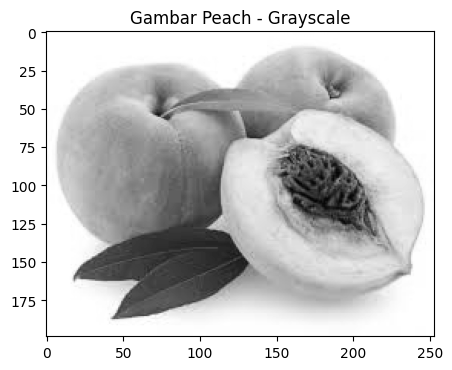

In [173]:
# membaca gambar dalam mode warna
image = cv2.imread('Peach.jpg', cv2.COLOR_BGR2GRAY)

# mendapatkan resolusi gambar dalam piksel
height, width, channels = image.shape
print(f"Resolusi gambar : {width}x{height} piksel")

# konversi warna dari BGR (OpenCV) ke RGB (Matplotlib)
image_gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# menyimpan gambar hasil grayscale
cv2.imwrite('grayscale_image.jpg', image_gray1)

# menampilkan gambar
plt.figure(figsize=(5,5))
plt.imshow(image_gray1, cmap='gray')
plt.title('Gambar Peach - Grayscale')
plt.show()

### **B. Spatial fitering**


*   Terapkan filter rata-rata (averaging filtering) 3x3 pada gambar asli. apa yang terjadi jika filter 5x5 atau 7x7 digunakan? Berikan penjelasan perbedaannya.

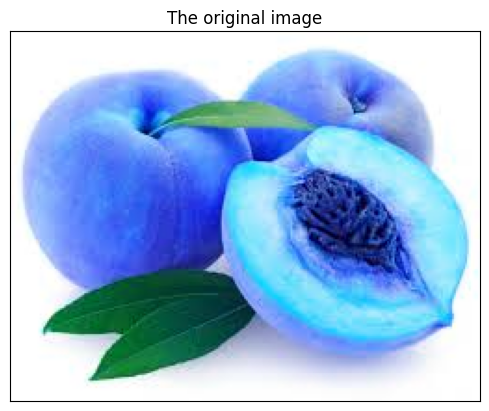

In [174]:
ref = cv2.imread('Peach.jpg')
plt.imshow(ref), plt.grid(False),
plt.title('The original image')
plt.xticks([])
plt.yticks([])
plt.show()

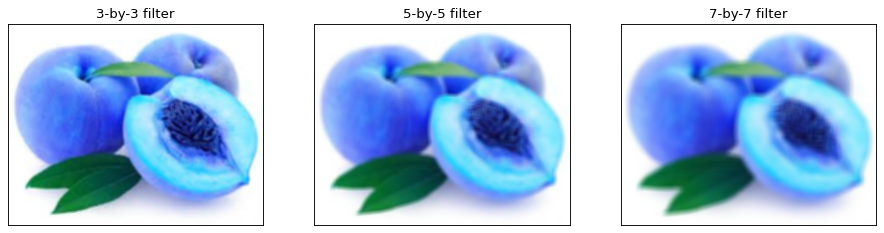

In [175]:
# Defining a kernel using numpy.
kernel_5 = np.ones((5,5),np.float32)/25
kernel_3 = np.ones((3,3),np.float32)/9
kernel_7 = np.ones((7,7),np.float32)/49

# Convolves an image with the kernel.
# -1 means that the center of the kernel is located on the center pixel.
# compare two kernel sizes.
filtered_5 = cv2.filter2D(ref,-1,kernel_5)
filtered_3 = cv2.filter2D(ref,-1,kernel_3)
filtered_7 = cv2.filter2D(ref,-1,kernel_7)

# plot the results in two subplots.
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(131), plt.imshow(filtered_3), plt.title('3-by-3 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(132), plt.imshow(filtered_5), plt.title('5-by-5 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(133), plt.imshow(filtered_7), plt.title('7-by-7 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.show()

### **Penjelasan tentang perbedaanya**

---
Averaging filter adalah teknik yang digunakan dalam pemrosesan gambar untuk mengurangi noise dengan mengganti setiap piksel dalam gambar dengan rata-rata nilai piksel yang di sekitarnya.
Berikut adalah penjelasan tentang efek penggunaan filter 3x3, 5x5, 7x7

1.   3x3

Penggunaannya menghitung rata-rata dari 9 piksel (piksel pusat dan 8 piksel di sekelilingnya).

Efek :
* Menyebabkan penghalusan gambar dengan
mengurangi noise.
* Ditail gambar masih cukup bagus, namun terdapat sedikit kehingan detail pada tepi-tepi objek

2. 5x5

Penggunaanya menghitung rata-rata dari 25 piksel

Efek :
* Menghasilkan efek penghalusan yang lebih kuat dibandingkan dengan filter 3x3.
* Mengurangi noise lebih banyak tetapi dapat menyebabkan kehilangan detail yang lebih signifikan
* Tepi objek menjadi blur dan kurang tajam

3. 7x7

Penggunaannya menghitung rata-rata dari 49 piksel.

Efek :
* Memberikan penghalusan yang paling signifikan dibandingkan dengan filter 3x3 dan 5x5.
* Noise akan sangat berkurang, tetapi detail citra hampir hilang, dan tepi objek menjadi sangat blur.
* Dalam beberapa study kasus, efek ini dapat menyebabkan hilangnya fitur penting dalam citra.

Analisis Perbedaan :
* Kekuatan Penghalusan: Semakin besar ukuran filter (3x3, 5x5, 7x7), semakin banyak piksel yang terlibat dalam perhitungan rata-rata, yang berakibat pada penghalusan yang lebih kuat.
* Kehilangan Detail: Meskipun filter yang lebih besar efektif dalam mengurangi noise, mereka juga dapat menyebabkan hilangnya detail dan ketajaman. Dengan filter yang lebih besar, detail kecil dalam citra dapat hilang, yang penting untuk analisis atau pemrosesan lebih lanjut.
* Aplikasi yang Tepat: Pilihan ukuran filter harus disesuaikan dengan tujuan pemrosesan citra. Untuk aplikasi yang memerlukan detail tinggi, filter 3x3 mungkin lebih mendukung sedangkan untuk aplikasi yang lebih fokus pada pengurangan noise, filter 5x5 atau 7x7 dapat digunakan, dengan pertimbangan terhadap kehilangan detail.



### **C. Tampilan dan bandingkan hasil**


*   Tampilkan dari dari setiap kernel yang sudah anda aplikasikan pada gambar



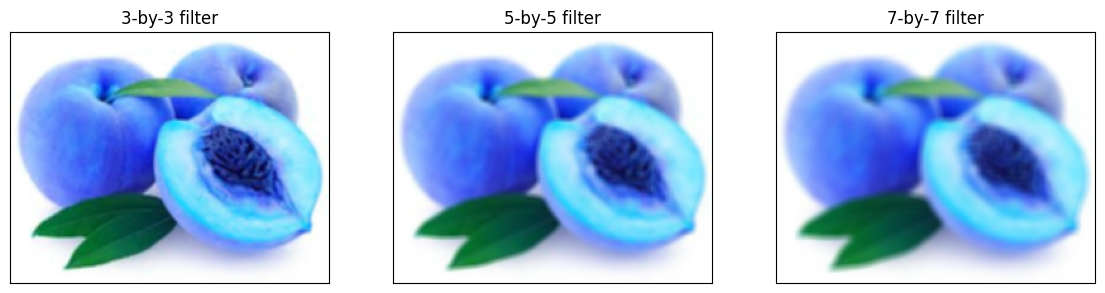

In [176]:
# Plot hasil gambar yang sudah diproses tanpa melakukan pemrosesan ulang
fig = plt.figure(figsize=(14, 14))

# Menampilkan hasil filter 3x3
plt.subplot(131)
plt.imshow(filtered_3, cmap='gray')
plt.title('3-by-3 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Menampilkan hasil filter 5x5
plt.subplot(132)
plt.imshow(filtered_5, cmap='gray')
plt.title('5-by-5 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Menampilkan hasil filter 7x7
plt.subplot(133)
plt.imshow(filtered_7, cmap='gray')
plt.title('7-by-7 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Menampilkan ulang hasil
plt.show()

cara ke2

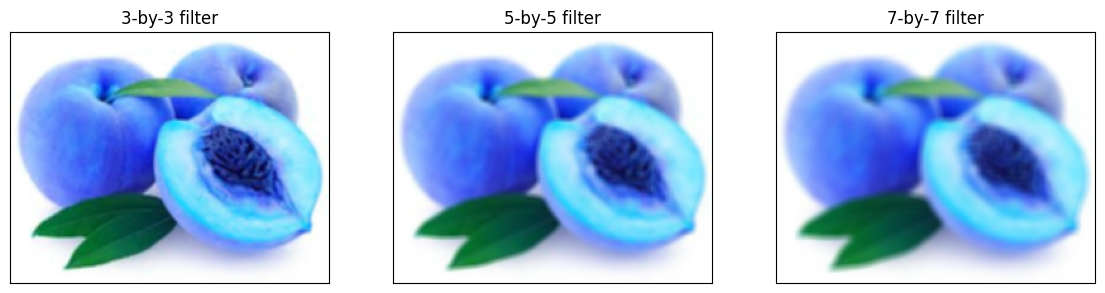

In [177]:
# Plot hasil gambar yang sudah diproses tanpa melakukan pemrosesan ulang
fig = plt.figure(figsize=(14, 14))

# Daftar hasil filter dan judulnya
filters = [(filtered_3, '3-by-3 filter'), (filtered_5, '5-by-5 filter'), (filtered_7, '7-by-7 filter')]

# Menampilkan hasil filter dengan loop
for i, (filtered_image, title) in enumerate(filters):
    plt.subplot(1, 3, i + 1)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(title)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

# Menampilkan ulang hasil
plt.show()
